In [2]:
from keras.preprocessing import sequence
from keras.models import Sequential 
from keras.layers import Dense, Embedding, Dropout
from keras.layers import LSTM, CuDNNLSTM
from keras.datasets import imdb

from distutils.version import LooseVersion as LV
from keras import __version__
from keras import backend as K

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

print('Usando Keras em sua versão: {0}. \nBackend {1}.'.format(__version__, K.backend()))
assert(LV(__version__) >= LV("2.0.0"))


Using TensorFlow backend.


Usando Keras em sua versão: 2.2.4. 
Backend tensorflow.


In [3]:
# Maximo de Palavras
nb_words = 10000

# Max de palavras por texto
maxlen = 80

print('Carregando...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=nb_words)

print('Original')
print('x_train: {0}.'.format(x_train.shape))
print('x_test: {0}.'.format(x_test.shape))
print()

print('Sequencias(amostras x tempo)')

# Sequenciando treino e teste
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print('Pos-Sequence')
print('x_train: {0}'.format(x_train.shape))
print('x_test: {0}'.format(x_test.shape))


Carregando...
17465344/17464789 [==============================] - 3s 0us/step
Original
x_train: (25000,).
x_test: (25000,).

Sequencias(amostras x tempo)
Pos-Sequence
x_train: (25000, 80)
x_test: (25000, 80)


In [5]:
type(x_train[0])

numpy.ndarray

In [0]:
print("Primeira review no set treinamento: \n {0} \n Comprimento: \n {1} \n Classe: \n {2}".format(x_train[0], len(x_train[0]) ,y_train[0]))

Primeira review no set treinamento: 
 [  15  256    4    2    7 3766    5  723   36   71   43  530  476   26
  400  317   46    7    4    2 1029   13  104   88    4  381   15  297
   98   32 2071   56   26  141    6  194 7486   18    4  226   22   21
  134  476   26  480    5  144   30 5535   18   51   36   28  224   92
   25  104    4  226   65   16   38 1334   88   12   16  283    5   16
 4472  113  103   32   15   16 5345   19  178   32] 
 Comprimento: 
 80 
 Classe: 
 1


In [0]:
# Parametros do Modelo

# Conjunto de palavas
embedding_dims = 50

# Conjunto de neuronios com perfil LSTM
lstm_units = 32

print('Construindo Modelo...')
model = Sequential()
# Entradas
model.add(Embedding(nb_words, 
                    embedding_dims, 
                    input_length=maxlen))
model.add(Dropout(0.2))
# Com CUDA
model.add(CuDNNLSTM(lstm_units, return_sequences=True))

# Sem CUDA
#model.add(LSTM(lstm_units))

# Para empilhar várias RNN todas as camadas exceto a última precisam ter 'return_sequences'
#model.add(LSTM(lstm_units, return_sequences=True))
model.add(LSTM(lstm_units))

model.add(Dense(1, activation='sigmoid'))

# Tentem utilizar outros otimizadores e configurações

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

print(model.summary())

Construindo Modelo...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 80, 50)            500000    
_________________________________________________________________
dropout_10 (Dropout)         (None, 80, 50)            0         
_________________________________________________________________
cu_dnnlstm_3 (CuDNNLSTM)     (None, 80, 32)            10752     
_________________________________________________________________
lstm_10 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 519,105
Trainable params: 519,105
Non-trainable params: 0
_________________________________________________________________
None


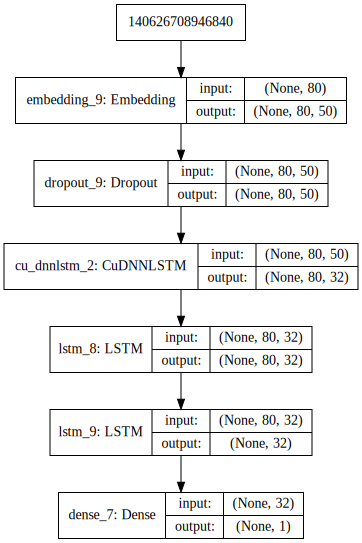

In [0]:
# Visualizar a rede
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [0]:
# Treino
training = model.fit(x_train, 
                     y_train, 
                     batch_size=256,
                     epochs=5, 
                     validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 14s 700us/step - loss: 0.5695 - acc: 0.6802 - val_loss: 0.4230 - val_acc: 0.8056
Epoch 2/5
20000/20000 [==============================] - 11s 561us/step - loss: 0.3320 - acc: 0.8602 - val_loss: 0.3760 - val_acc: 0.8272
Epoch 3/5
20000/20000 [==============================] - 11s 542us/step - loss: 0.2514 - acc: 0.9046 - val_loss: 0.3927 - val_acc: 0.8288
Epoch 4/5
20000/20000 [==============================] - 11s 556us/step - loss: 0.2140 - acc: 0.9213 - val_loss: 0.4347 - val_acc: 0.8226
Epoch 5/5
20000/20000 [==============================] - 11s 564us/step - loss: 0.1777 - acc: 0.9353 - val_loss: 0.4381 - val_acc: 0.8190


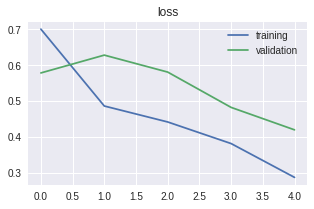

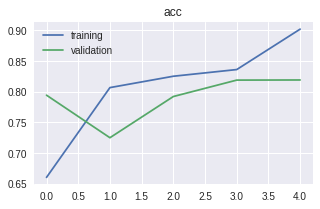

In [0]:
#%matplotlib inline

plt.figure(figsize=(5,3))
plt.plot(training.epoch, training.history['loss'], label='training')
plt.plot(training.epoch, training.history['val_loss'], label='validation')
plt.title('loss')
plt.legend(loc='best')

plt.figure(figsize=(5,3))
plt.plot(training.epoch, training.history['acc'], label='training')
plt.plot(training.epoch, training.history['val_acc'], label='validation')
plt.title('acc')
plt.legend(loc='best')